In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates
plt.style.use('ggplot')
%matplotlib inline

In [23]:
# read excel file
df = pd.read_excel('C:/Anaconda3/projects/oled/oled.xlsx', sheetname='phosphor_model')
df = df[list(df.columns)[1:-6] + ['cd/A']]
print(df.shape)
df.head()

(126, 32)


,homo_HIL,thickness_HIL,lumo_HTL1,homo_HTL1,thickness_HTL1,lumo_HTL2,homo_HTL2,thickness_HTL2,lumo_HTL3,homo_HTL3,...,total_ETL_thickness,lumo_ETL1,homo_ETL1,thickness_ETL1,lumo_ETL2,homo_ETL2,thickness_ETL2,cathode_workfunction,thickness_EIL,cd/A
0,5.2,60.0,2.2,5.8,10,2.2,5.8,0,2.2,5.8,...,0,NaN,3.5,0.0,NaN,3.5,0,3.5,1.0,9.7
1,5.3,3.0,1.9,5.1,50,1.9,5.1,0,1.9,5.1,...,28,2.8,6.2,25.0,3.5,7.0,3,2.9,15.0,11.0
2,5.3,3.0,1.9,5.1,50,1.9,5.1,0,1.9,5.1,...,28,2.8,6.2,25.0,3.5,7.0,3,2.9,15.0,7.0
3,5.3,3.0,1.9,5.1,50,1.9,5.1,0,1.9,5.1,...,28,2.8,6.2,25.0,3.5,7.0,3,2.9,15.0,2.0
4,5.2,60.0,2.5,5.2,10,2.4,5.9,10,2.4,5.9,...,15,2.5,6.8,0.0,2.5,6.8,15,3.5,1.0,22.2


In [24]:
#Checking for missing data
NAs = df.isnull().sum()
NAs.sort_values(0, ascending=False)
NAs[NAs > 0]

#drop the missing data
df.dropna(axis=0, inplace=True)
print(df.shape)

(123, 32)


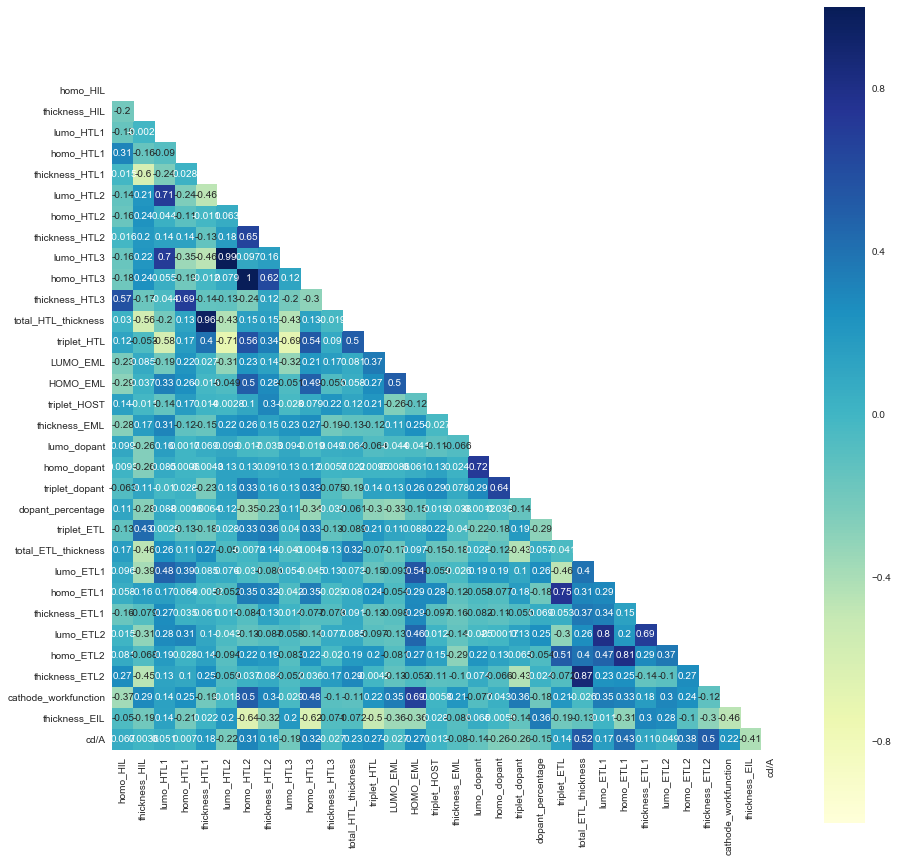

List the features in descending order of their correlation with cd/A:

total_ETL_thickness:   0.5245547459012185
thickness_ETL2:   0.500822919439442
homo_ETL1:   0.4276219408548536
thickness_EIL:   -0.40936835086810675
homo_ETL2:   0.37868204325825167
homo_HTL3:   0.3156739312906309
homo_HTL2:   0.30730572371042575
HOMO_EML:   0.2677362874610283
triplet_HTL:   0.2651852500712842
triplet_dopant:   -0.26368160133329266
homo_dopant:   -0.25625626031789334
total_HTL_thickness:   0.22571512788407766
cathode_workfunction:   0.22280302068247784
lumo_HTL2:   -0.22131641110731415
lumo_HTL3:   -0.18970487106628248
thickness_HTL1:   0.18213985591417436
lumo_ETL1:   0.16839165573869327
thickness_HTL2:   0.16275231354783126
dopant_percentage:   -0.15180895524997287
lumo_dopant:   -0.14369027372375662
triplet_ETL:   0.13732644352049292
thickness_ETL1:   0.10898002685953502
thickness_EML:   -0.07966304604273369
homo_HIL:   0.06704732992038358
lumo_HTL1:   0.05125058078731447
lumo_ETL2:   0.0485369038

In [3]:
X = df[list(df.columns)[:]]

corr = X.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(15, 15))
    sns.heatmap(corr, vmax=1, square=True, cmap="YlGnBu",linecolor='black', mask=mask, annot=True)
    plt.yticks(rotation=0)
    plt.xticks(rotation=90)
    plt.show()

cor_dict = corr['cd/A'].to_dict()
del cor_dict['cd/A']
print("List the features in descending order of their correlation with cd/A:\n")
for ele in sorted(cor_dict.items(), key=lambda x: -abs(x[1])):
    print("{0}:   {1}".format(*ele))

In [25]:
X = df.iloc[:, :-1]
y = df[['cd/A']]
print(X.shape)
X.head()

(123, 31)


,homo_HIL,thickness_HIL,lumo_HTL1,homo_HTL1,thickness_HTL1,lumo_HTL2,homo_HTL2,thickness_HTL2,lumo_HTL3,homo_HTL3,...,triplet_ETL,total_ETL_thickness,lumo_ETL1,homo_ETL1,thickness_ETL1,lumo_ETL2,homo_ETL2,thickness_ETL2,cathode_workfunction,thickness_EIL
1,5.3,3.0,1.9,5.1,50,1.9,5.1,0,1.9,5.1,...,2.60,28,2.8,6.2,25.0,3.5,7.0,3,2.9,15.0
2,5.3,3.0,1.9,5.1,50,1.9,5.1,0,1.9,5.1,...,2.60,28,2.8,6.2,25.0,3.5,7.0,3,2.9,15.0
3,5.3,3.0,1.9,5.1,50,1.9,5.1,0,1.9,5.1,...,2.60,28,2.8,6.2,25.0,3.5,7.0,3,2.9,15.0
4,5.2,60.0,2.5,5.2,10,2.4,5.9,10,2.4,5.9,...,3.36,15,2.5,6.8,0.0,2.5,6.8,15,3.5,1.0
5,6.1,30.0,2.4,5.9,20,2.4,5.9,0,2.4,5.9,...,2.80,20,3.2,7.0,0.0,3.2,7.0,20,4.3,0.0


In [11]:
y.head()

,cd/A
1,11.000000
2,7.000000
3,2.000000
4,22.200000
5,8.864103


In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

## Feature Selection

Here we are trying to figure out which feature affect the efficiency the most. Since the data that we have are limited, complex model with many features are not going to give us the best result. Hence we reduce the number of feature thus minimizing the complexity of the model. One way to do this is by using the result from correaltion heatmap above. Another ways is using SelectKBest features in scikit learn and setting f regression and mututal info regression as metrics. 

In [13]:
from sklearn.feature_selection import SelectKBest, f_regression

# find best 10 features using f_regression
select_feature = SelectKBest(f_regression, k=10).fit(X_train, y_train.values.ravel())

scores = select_feature.scores_
names = X_train.columns
scores,names  = zip(*sorted(zip(scores, names), reverse=True))

fmt = '{:<8}{:<20}{}'
print(fmt.format('', 'scores', 'names'))
for i, (name, score) in enumerate(zip(names, scores)):
    print(fmt.format(i, name, score))

        scores              names
0       thickness_ETL2      25.631230840059725
1       homo_ETL1           25.103100202343445
2       total_ETL_thickness 24.200050461411646
3       thickness_EIL       21.312950114625732
4       homo_ETL2           16.721607761395628
5       homo_HTL3           6.416524572618532
6       HOMO_EML            6.029838678204883
7       homo_HTL2           5.9502776540869275
8       lumo_HTL2           5.40058118611424
9       triplet_HTL         5.321522193151362
10      cathode_workfunction5.171904473799965
11      homo_dopant         5.0190020852280925
12      lumo_HTL3           4.2409878230142555
13      triplet_dopant      3.789248313577343
14      lumo_dopant         3.7428724648473484
15      lumo_ETL1           3.1637954963430945
16      dopant_percentage   2.5695084243637516
17      total_HTL_thickness 1.3195647432136681
18      thickness_HTL1      0.9152590727516542
19      thickness_EML       0.843757643486564
20      thickness_HIL       0.6579

In [15]:
from sklearn.feature_selection import mutual_info_regression

# find best scored features using mutual_info_regression
select_feature = SelectKBest(mutual_info_regression, k=10).fit(X_train, y_train.values.ravel())

scores = select_feature.scores_
names = X_train.columns
scores,names  = zip(*sorted(zip(scores, names), reverse=True))

fmt = '{:<8}{:<20}{}'
print(fmt.format('', 'scores', 'names'))
for i, (name, score) in enumerate(zip(names, scores)):
    print(fmt.format(i, name, score))

        scores              names
0       lumo_ETL2           0.38896258424399743
1       homo_ETL2           0.3757625402659057
2       thickness_EIL       0.31690988551164323
3       triplet_ETL         0.29858592542333406
4       lumo_ETL1           0.29335124952269
5       homo_ETL1           0.2918024352059212
6       total_ETL_thickness 0.2886487296398408
7       total_HTL_thickness 0.24824788463289105
8       thickness_HTL1      0.24268688622817658
9       homo_HTL2           0.19784325131762648
10      thickness_ETL2      0.19559340362427236
11      homo_HTL3           0.19494497154427615
12      HOMO_EML            0.16632142585837117
13      triplet_dopant      0.16481399974831712
14      thickness_EML       0.1492545477118017
15      LUMO_EML            0.14040156543137394
16      lumo_dopant         0.12374467380820664
17      cathode_workfunction0.12286020914243734
18      thickness_HIL       0.12153508912169153
19      homo_dopant         0.11053698464895345
20      thick

In [16]:
print(names)

('lumo_ETL2', 'homo_ETL2', 'thickness_EIL', 'triplet_ETL', 'lumo_ETL1', 'homo_ETL1', 'total_ETL_thickness', 'total_HTL_thickness', 'thickness_HTL1', 'homo_HTL2', 'thickness_ETL2', 'homo_HTL3', 'HOMO_EML', 'triplet_dopant', 'thickness_EML', 'LUMO_EML', 'lumo_dopant', 'cathode_workfunction', 'thickness_HIL', 'homo_dopant', 'thickness_HTL2', 'triplet_HOST', 'homo_HTL1', 'dopant_percentage', 'thickness_HTL3', 'homo_HIL', 'lumo_HTL1', 'lumo_HTL3', 'lumo_HTL2', 'triplet_HTL', 'thickness_ETL1')


In [18]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state=2)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

R-squared:  0.444900517599
MS Error:  141.401702204


In [9]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=8, shuffle=True, random_state=2)
scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

scores:  [ 0.50554203  0.3169529   0.48732577  0.56228668  0.78269189  0.57959215
  0.08114555  0.57284705]
mean score:  0.486048002691


        column              importance
0       thickness_EIL       0.2017927185451235
1       triplet_ETL         0.10846298232352251
2       total_ETL_thickness 0.09156323582195092
3       triplet_HOST        0.07463995607577767
4       lumo_ETL2           0.0657051521938177
5       HOMO_EML            0.043942667297077395
6       LUMO_EML            0.039171217594638076
7       thickness_ETL2      0.038958579879595924
8       homo_ETL1           0.032418445639844064
9       thickness_HTL1      0.030514516578104396
10      homo_dopant         0.0267284657332904
11      homo_ETL2           0.024581268708241285
12      triplet_HTL         0.02371493110848912
13      lumo_ETL1           0.02301083985315921
14      thickness_HIL       0.022813379632572916
15      lumo_dopant         0.022447414482228985
16      thickness_HTL3      0.02011958532511567
17      cathode_workfunction0.018962487200071314
18      dopant_percentage   0.016165871367106517
19      thickness_HTL2      0.015104846958

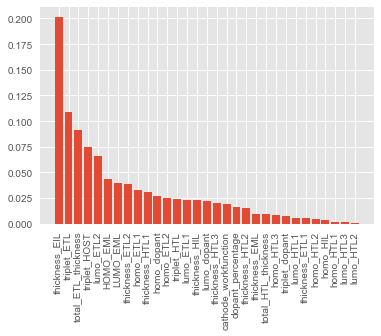

In [21]:
importance = regressor.feature_importances_.tolist()
names = list(X)

importance, names = zip(*sorted(zip(importance, names), reverse=True))

fmt = '{:<8}{:<20}{}'
print(fmt.format('', 'column', 'importance'))
for i, (name, coef) in enumerate(zip(names, importance)):
    print(fmt.format(i, name, coef))

x = np.arange(31)
plt.bar(x, importance)
plt.xticks(x, names, rotation=90);

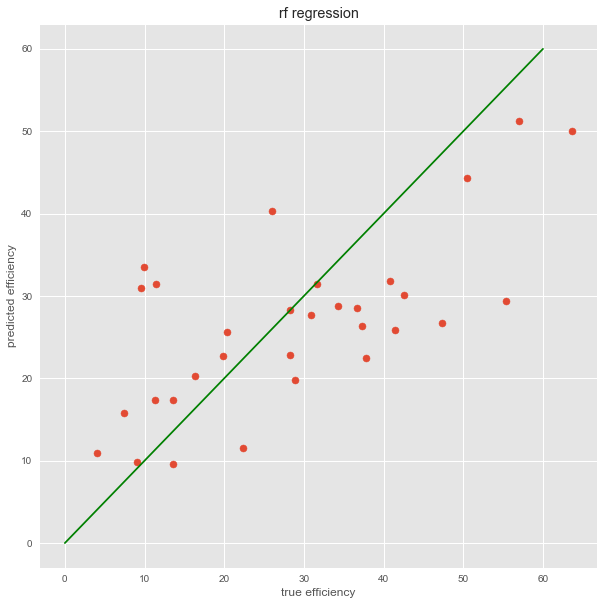

In [22]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.scatter(y_test, y_predictions)
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' rf regression ')
plt.show()

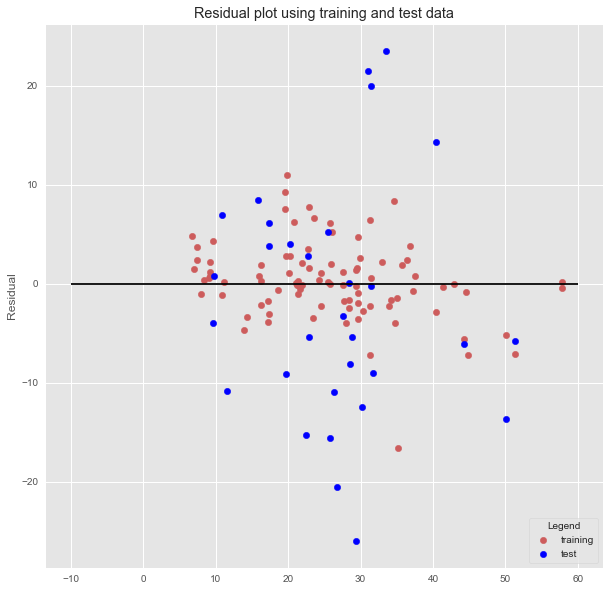

In [23]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train).reshape(len(X_train))-y_train.values.reshape(len(y_train)), c='indianred', s=40, 
           label='training')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test).reshape(len(X_test))-np.asarray(y_test).reshape(len(y_test)), c='b', s=40,
            label ='test')
plt.hlines(y=0, xmin=-10, xmax=60)
plt.title('Residual plot using training and test data')
plt.ylabel('Residual')
plt.legend(loc=4, frameon=True, title='Legend');

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train.values.ravel())
y_predictions = regressor.predict(X_test_scaled)


scores = cross_val_score(regressor, X_train_scaled, y_train.values.ravel(), cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

# Check how our model is doing
print('R-squared: ', regressor.score(X_test_scaled, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

scores:  [ -2.15537338e+02  -5.78150210e+00  -4.62186568e-01   1.68060292e-01
  -3.03641378e-04   1.56320838e-01   4.61052203e-01   6.18069534e-01]
mean score:  -27.5472284268
R-squared:  -32.1190773138
MS Error:  8436.49481951


In [29]:
X_1 = df[['lumo_ETL2'] + ['homo_ETL2'] +['thickness_EIL']+ ['triplet_ETL'] +['lumo_ETL1'] + ['homo_ETL1'] + ['total_ETL_thickness']
       + ['total_HTL_thickness'] + ['thickness_HTL1'] + ['homo_HTL2'] +['thickness_ETL2'] + ['homo_HTL3'] + ['HOMO_EML'] + 
       ['triplet_dopant'] + ['thickness_EML']]
X_train, X_test, y_train, y_test = train_test_split(X_1, y,test_size=0.25, random_state=7)

regressor = RandomForestRegressor(random_state=2)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# cross val score
scores = cross_val_score(regressor, X_train, y_train.values.ravel(), cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

scores:  [ 0.24969139 -1.81172069 -0.67138112  0.51952533  0.70323453  0.74163388
  0.76436112  0.724155  ]
mean score:  0.152437428589
R-squared:  0.332493249453
MS Error:  170.035450856


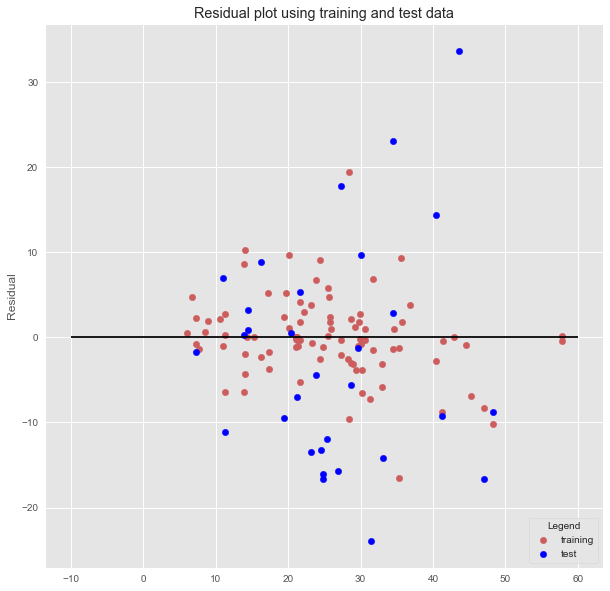

In [27]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train).reshape(len(X_train))-y_train.values.reshape(len(y_train)), c='indianred', s=40, 
           label='training')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test).reshape(len(X_test))-np.asarray(y_test).reshape(len(y_test)), c='b', s=40,
            label ='test')
plt.hlines(y=0, xmin=-10, xmax=60)
plt.title('Residual plot using training and test data')
plt.ylabel('Residual')
plt.legend(loc=4, frameon=True, title='Legend');

In [26]:
from xgboost import XGBRegressor, plot_importance
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

# Choose regression algorithm
regressor = XGBRegressor()

regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

scores = cross_val_score(regressor, X, y, cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

R-squared:  0.401931172888
MS Error:  152.347377128
scores:  [ 0.42507036  0.32862323  0.52619919  0.58056799  0.71488204  0.66262394
 -0.20924692  0.62825008]
mean score:  0.457121239825


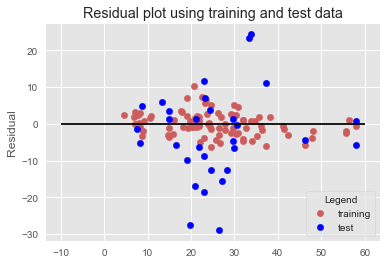

In [27]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train).reshape(len(X_train))-y_train.values.reshape(len(y_train)), c='indianred', s=40, 
           label='training')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test).reshape(len(X_test))-np.asarray(y_test).reshape(len(y_test)), c='b', s=40,
            label ='test')
plt.hlines(y=0, xmin=-10, xmax=60)
plt.title('Residual plot using training and test data')
plt.ylabel('Residual')
plt.legend(loc=4, frameon=True, title='Legend');

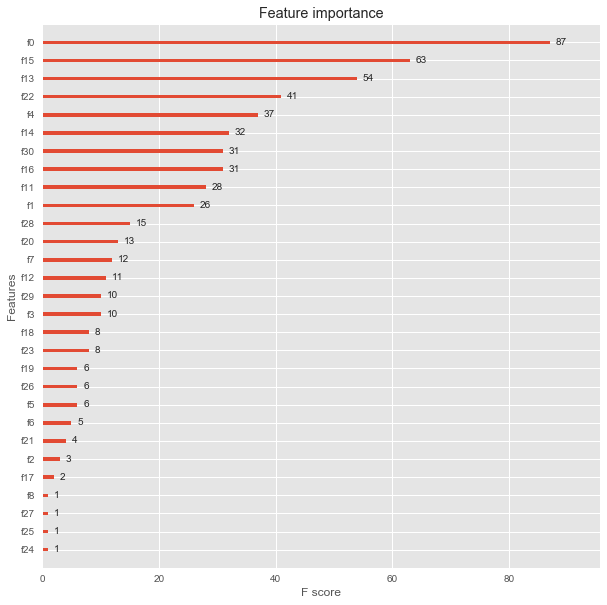

In [35]:
plot_importance(regressor);

In [14]:
from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor(random_state = 1)

regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))
print('RMS Error: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

R-squared:  0.454637463163
MS Error:  138.921388817
RMS Error:  11.7864917943
scores:  [ 0.60702827  0.47877972  0.43099691  0.52815014  0.73969967  0.65299842
  0.38416821  0.50902783]
mean score:  0.541356144373


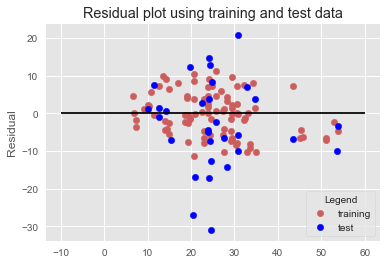

In [15]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train).reshape(len(X_train))-y_train.values.reshape(len(y_train)), c='indianred', s=40, 
           label='training')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test).reshape(len(X_test))-np.asarray(y_test).reshape(len(y_test)), c='b', s=40,
            label ='test')
plt.hlines(y=0, xmin=-10, xmax=60)
plt.title('Residual plot using training and test data')
plt.ylabel('Residual')
plt.legend(loc=4, frameon=True, title='Legend');

In [16]:
# from tpot import TPOTRegressor

# tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)
# tpot.fit(X_train, y_train)
# print(tpot.score(X_test, y_test))
# tpot.export('tpot_pholed.py')

Version 0.9.0 of tpot is outdated. Version 0.9.1 was released Friday November 10, 2017.


C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Generation 1 - Current best internal CV score: 76.88186688247438


Generation 2 - Current best internal CV score: 76.88186688247438


Generation 3 - Current best internal CV score: 71.6024711622713


Generation 4 - Current best internal CV score: 71.6024711622713


Generation 5 - Current best internal CV score: 71.6024711622713



Best pipeline: RandomForestRegressor(RandomForestRegressor(ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.75, min_samples_leaf=8, min_samples_split=5, n_estimators=100), bootstrap=True, max_features=0.65, min_samples_leaf=1, min_samples_split=18, n_estimators=100), bootstrap=True, max_features=0.1, min_samples_leaf=2, min_samples_split=6, n_estimators=100)
139.578662112


True

In [20]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=False, max_features=0.7500000000000001, min_samples_leaf=8, min_samples_split=5, n_estimators=100)),
    StackingEstimator(estimator=RandomForestRegressor(bootstrap=True, max_features=0.6500000000000001, min_samples_leaf=1, min_samples_split=18, n_estimators=100)),
    RandomForestRegressor(bootstrap=True, max_features=0.1, min_samples_leaf=2, min_samples_split=6, n_estimators=100)
)

exported_pipeline.fit(X_train, y_train.values.ravel())
y_pred = exported_pipeline.predict(X_test)

print('R-squared: ', exported_pipeline.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_pred))
print('RMS Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

R-squared:  0.520046922905
MS Error:  122.259494434
RMS Error:  11.0571015386
scores:  [ 0.60702827  0.47877972  0.43099691  0.52815014  0.73969967  0.65299842
  0.38416821  0.50902783]
mean score:  0.541356144373


In [21]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(random_state = 1)

regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))
print('RMS Error: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

R-squared:  0.361338791823
MS Error:  162.687562916
RMS Error:  12.7549034852
scores:  [ 0.41103108  0.31946009  0.52121928  0.53378616  0.7130409   0.52556392
  0.18383496  0.58798014]
mean score:  0.474489565066


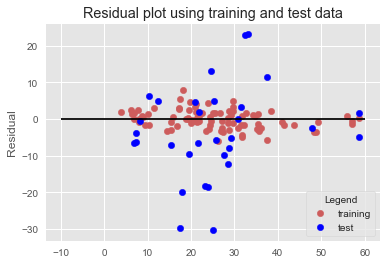

In [22]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train).reshape(len(X_train))-y_train.values.reshape(len(y_train)), c='indianred', s=40, 
           label='training')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test).reshape(len(X_test))-np.asarray(y_test).reshape(len(y_test)), c='b', s=40,
            label ='test')
plt.hlines(y=0, xmin=-10, xmax=60)
plt.title('Residual plot using training and test data')
plt.ylabel('Residual')
plt.legend(loc=4, frameon=True, title='Legend');